# **Movie Rating Prediction**

> ### **DATA CLEANING**

*Importing Libraries and Reading Dataset*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')

dst = pd.read_csv("/content/drive/MyDrive/DS projects/DataSets/imdbmoviesindia.csv", encoding = 'latin-1')
dst.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [ ]:
dst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


*Renaming the spaces in the column name*

In [ ]:
dst.rename(columns={'Actor 1':'Actor_1','Actor 2':'Actor_2','Actor 3':'Actor_3'}, inplace=True)

*Cleaning the rows where the data was missing except Actors columns*

In [ ]:
dst = dst.dropna(subset=['Name', "Genre", "Rating", "Votes", "Director"]).reset_index(drop=True)

In [ ]:
dst.info()

# Here there are no gaps anywhere except for the actors, and the data of fields such as [Year,Duration,Votes] are not numeric. Let's fix it all at once

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7812 entries, 0 to 7811
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7812 non-null   object 
 1   Year      7812 non-null   object 
 2   Duration  5819 non-null   object 
 3   Genre     7812 non-null   object 
 4   Rating    7812 non-null   float64
 5   Votes     7812 non-null   object 
 6   Director  7812 non-null   object 
 7   Actor_1   7707 non-null   object 
 8   Actor_2   7641 non-null   object 
 9   Actor_3   7558 non-null   object 
dtypes: float64(1), object(9)
memory usage: 610.4+ KB


In [ ]:
dst

# Here we need to remove 'front and back paranthesis' from Year column, 'min' from Duration column, and 'comma' from Votes column

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor_1,Actor_2,Actor_3
0,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
3,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
4,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
7807,Zulm Ki Hukumat,(1992),NaN,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
7808,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
7809,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
7810,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [ ]:
# Converting all the three columns [Year,Duration,Votes] to the numeric type and replace the values where there are no actors with "None"

for index, row in dst.iterrows():
    dst.at[index, "Votes"] = pd.to_numeric(row["Votes"].replace(',',''), errors='coerce')
    dst.at[index, "Year"] = pd.to_numeric(row["Year"].replace("(",'').replace(")",''), errors='coerce')
    if not pd.isna(row["Duration"]):
        dst.at[index, "Duration"] = pd.to_numeric(row["Duration"].replace(' min',''), errors='coerce')
    for id in range(1,4):
        if pd.isna(row["Actor_"+str(id)]):
            dst.at[index,"Actor_"+str(id)] = "None"
dst = dst.astype({"Votes": "Int64", "Year": "Int64", "Duration": "Int64"})

In [ ]:
dst.info()
# Now only the Duration column has the defects of data, Let's Fix it

dst['Duration'].fillna(dst['Duration'].median(), inplace=True)

# Type conversion completed successfully,so Here no gaps

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7812 entries, 0 to 7811
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7812 non-null   object 
 1   Year      7812 non-null   Int64  
 2   Duration  5819 non-null   Int64  
 3   Genre     7812 non-null   object 
 4   Rating    7812 non-null   float64
 5   Votes     7812 non-null   Int64  
 6   Director  7812 non-null   object 
 7   Actor_1   7812 non-null   object 
 8   Actor_2   7812 non-null   object 
 9   Actor_3   7812 non-null   object 
dtypes: Int64(3), float64(1), object(6)
memory usage: 633.3+ KB


> ### **VISUALIZATION**

***Top 10 Movies by Votes Count***

In [ ]:
best_by_votes = dst.sort_values("Votes", ascending=False)[[ "Name", "Year", "Duration", "Votes", "Rating", "Director","Actor_1","Actor_2","Actor_3"]].reset_index(drop=True)
fig = ff.create_table(best_by_votes[:10])
fig.update_layout(
    title_text = 'Top 10 Movies by Votes Count',
    height = 600,
    margin = {'t':50},)
fig.show()

In [ ]:
best_by_votes1 = dst.sort_values("Votes", ascending=False)[[ "Name", "Year", "Duration", "Votes", "Rating", "Director","Actor_1","Actor_2","Actor_3"]].reset_index(drop=True)
res = (best_by_votes1['Votes']*best_by_votes1['Rating']).astype('int')
best_by_score = pd.concat([best_by_votes1, res], axis = 1)

In [ ]:
best_by_score = pd.concat([best_by_votes1, res], axis = 1)
best_by_score.rename(columns = {0:'Score'}, inplace = True)
best_by_score = best_by_score.sort_values('Score', ascending = False)

***Top 10 Movies Stated by Score***

In [ ]:
fig = ff.create_table(best_by_score[:10])
fig.update_layout(
    title_text = 'Top 10 Movies by Score',
    height = 600,
    margin = {'t':50},)
fig.show()

***Top 10 Movies by Rating***

In [ ]:
best_by_rating = dst.sort_values("Rating", ascending=False)[[ "Name", "Year", "Duration", "Votes", "Rating", "Director","Actor_1","Actor_2","Actor_3"]].reset_index(drop=True)

fig = ff.create_table(best_by_rating[:10])
fig.update_layout(
    title_text = 'Top 10 Movies by Rating',
    height = 600,
    margin = {'t':50},)
fig.show()

***Worst 10 Movies by Rating***

In [ ]:
worst = dst.sort_values("Rating").dropna()[[ "Name", "Year", "Duration", "Votes", "Rating", "Director", "Actor_1", "Actor_2", "Actor_3"]].reset_index(drop=True)

fig = ff.create_table(worst[:10])
fig.update_layout(
    title_text = 'Worst 10 Movies by Rating',
    height = 600,
    margin = {'t':50},)
fig.show()

***Top 10 Actors***

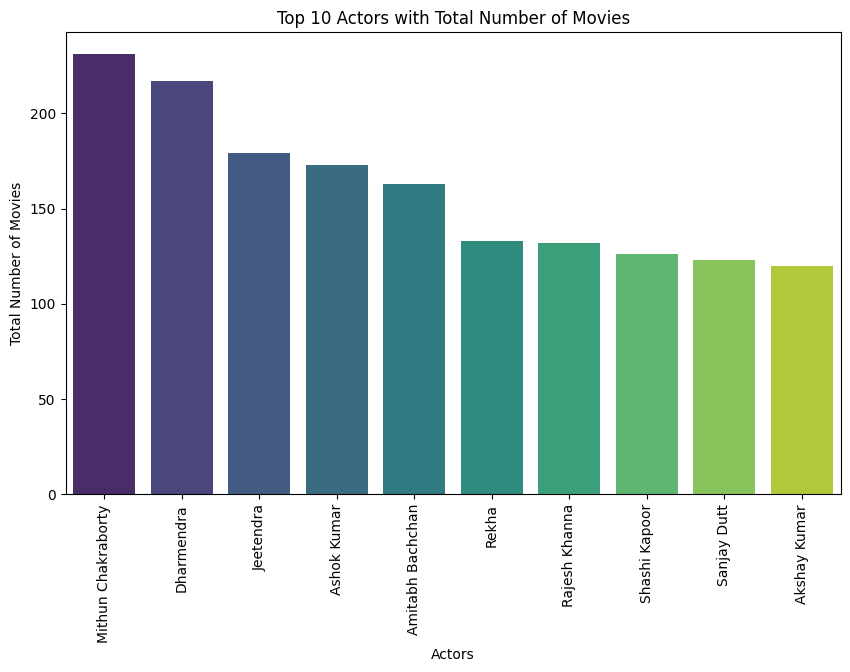

In [ ]:
top_actors = pd.concat([dst['Actor_1'], dst['Actor_2'], dst['Actor_3']]).dropna().value_counts()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_actors[1:11].index, y=top_actors[1:11].values, palette='viridis')
ax.set_xlabel('Actors')
ax.set_ylabel('Total Number of Movies')
ax.set_title('Top 10 Actors with Total Number of Movies')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

***Top 10 Directors***

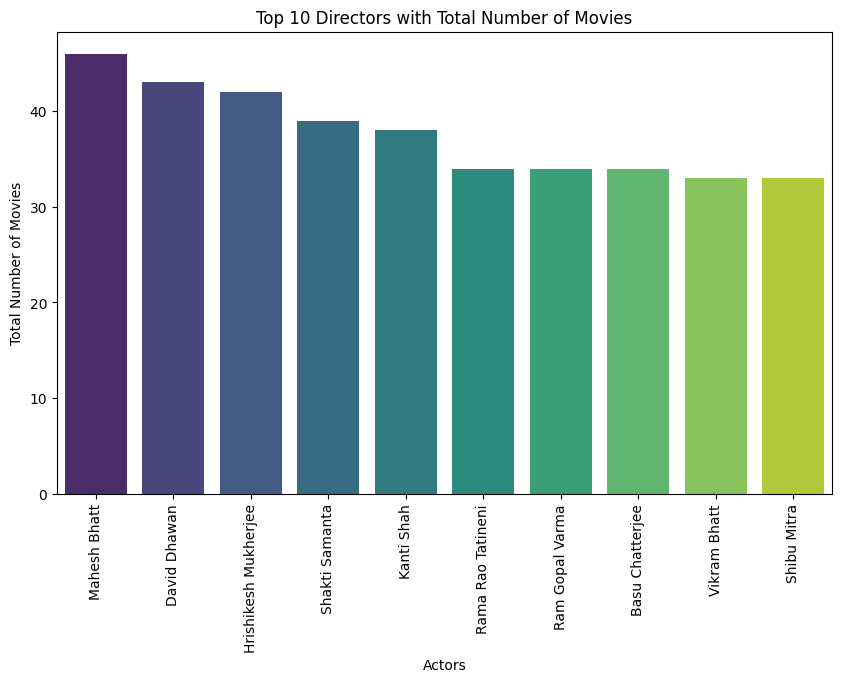

In [ ]:
top_directors = dst.Director.dropna().value_counts()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_directors[0:10].index, y=top_directors[0:10].values, palette='viridis')
ax.set_xlabel('Actors')
ax.set_ylabel('Total Number of Movies')
ax.set_title('Top 10 Directors with Total Number of Movies')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

***Top 20 Genres***

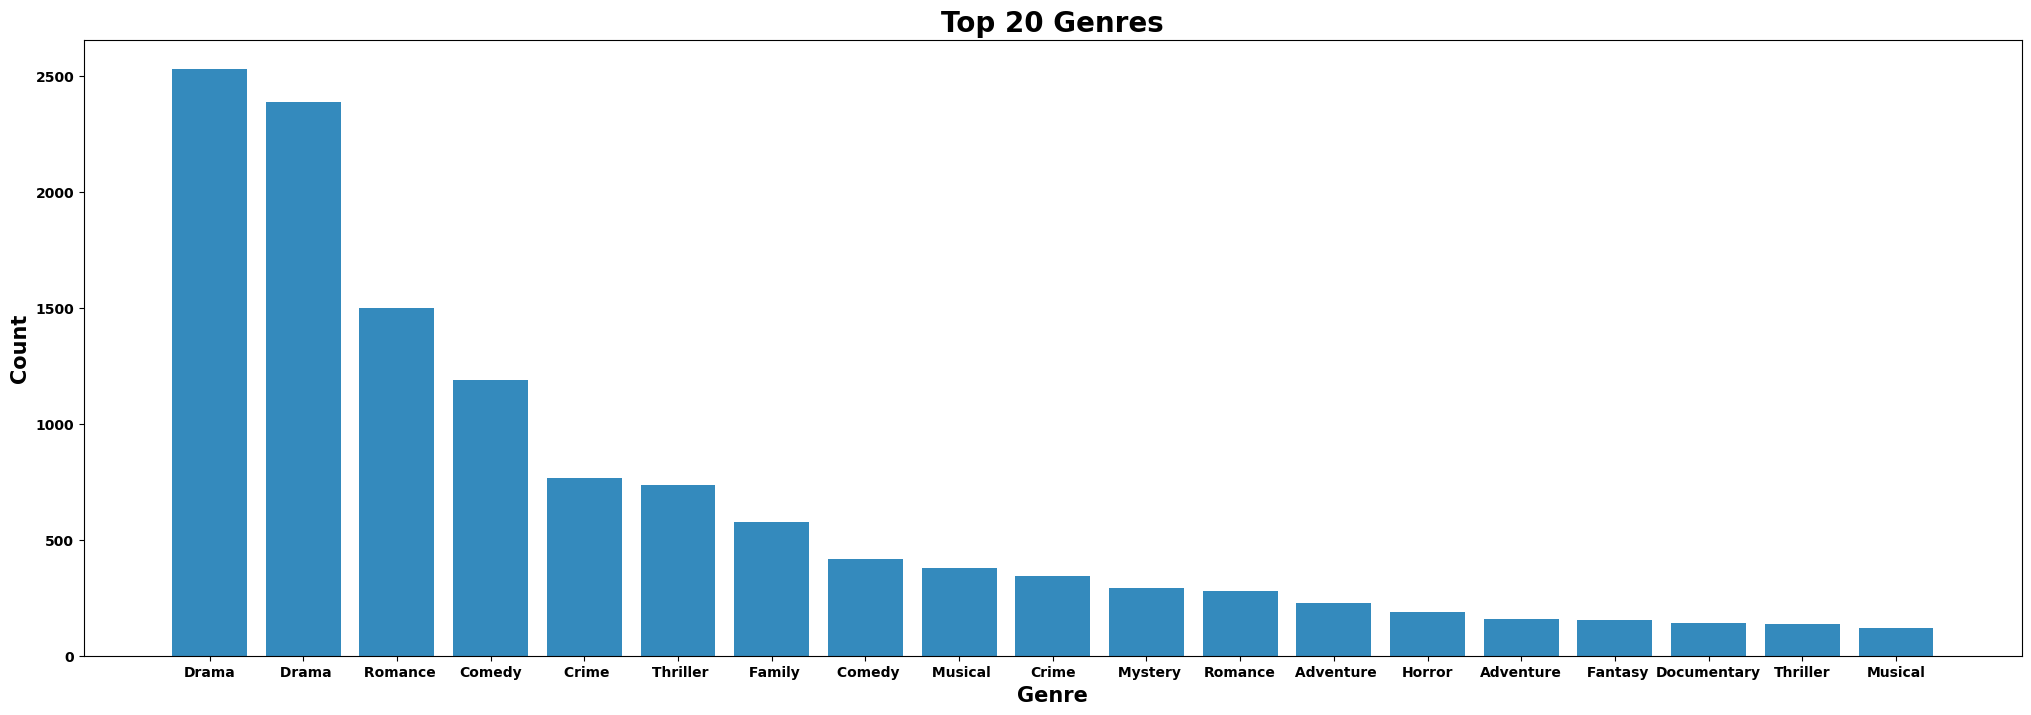

In [ ]:
from collections import Counter

#creating series for Genre column
top_genre=dst['Genre']

#initializing counter object
genre_counter=Counter()

#splitting the values if one row contain more than two values
for response in top_genre:
    genre_counter.update(response.split(','))

#Creating List to store the Counter values
top_genre=[]
frequency=[]

for items in genre_counter.most_common(20):
    top_genre.append(items[0])
    frequency.append(items[1])


#As Drama Appears more than twice in the List
top_genre.pop(2)
frequency.pop(2)
#this will not affect the data as Drama will remain on top whether we add them or remove them


fig= plt.figure(figsize=(25,8))
plt.bar(top_genre,frequency,color='#348ABD')
plt.title('Top 20 Genres',fontweight='bold',fontsize=20)
plt.xlabel('Genre',fontweight='bold',fontsize=15)
plt.ylabel('Count',fontweight='bold',fontsize=15)
plt.xticks(fontweight='bold',rotation=0)
plt.yticks(fontweight='bold')
plt.show()

***Correlation***

<Axes: >

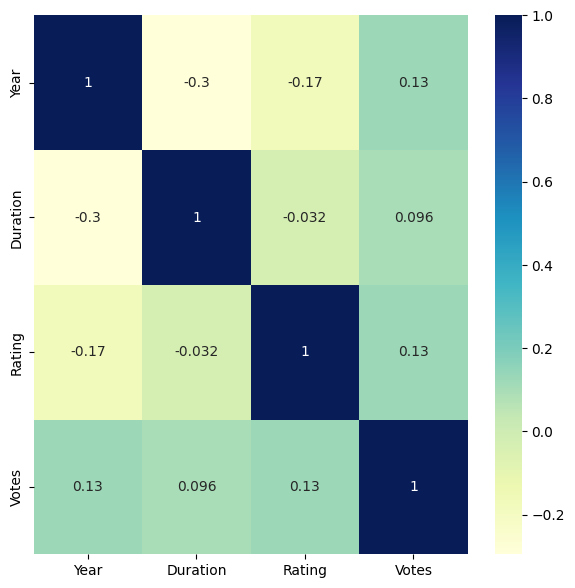

In [ ]:
fig= plt.figure(figsize=(7,7))
sns.heatmap(dst.corr(), cmap="YlGnBu", annot=True)


> ### **DATA PREPROCESSING**

In [ ]:
genre = dst['Genre']
genre_stack = genre.str.split(',').apply(pd.Series).stack()
genre_stack.index = genre_stack.index.droplevel(-1)
g=[genre.str.split(',').apply(pd.Series)[i].str.strip().value_counts(dropna=False).to_dict() for i in range(3)]
# g_dict = {}
# for dic in g:
#     for k,v in dic.items():
#         if k in g_dict:
#             g_dict[k]+=v
#         else:
#             g_dict[k]=v
# below code does same job as above
g_dict = {k: sum(dic.get(k,0) for dic in g) for dic in g for k in dic}
genres_count = pd.Series(g_dict).sort_values(ascending=False).drop(np.nan)
# Now for average rating of each genre
# genre_rating = {}
# for i in genres_count.index:
#     genre_rating[i]=df.loc[df['Genre'].str.contains(i),'Rating'].mean().round(1)
genre_rating = {k:dst.loc[dst['Genre'].str.contains(k),'Rating'].mean().round(1) for k in genres_count.index}
genre_rating = pd.Series(genre_rating).sort_values(ascending=False)
genres_single = pd.concat([genres_count,genre_rating],axis=1).sort_values(by=1,ascending=False).rename(columns={0:'Movie count',1:'Average rating'})
genres_single.sort_values(by='Movie count',ascending=False,inplace=True)

In [ ]:
# Creating Data Frames

# Genre
genre_df = dst.groupby('Genre').agg({'Rating':['mean','count']})
genre_df.reset_index(inplace=True)
genre_df.columns = ['Genre','Average Rating','Movie Count']
genre_df['Average Rating'] = genre_df['Average Rating'].round(1)

# Directors
directors  = dst.groupby('Director').agg({'Rating':['mean','count']})
directors.columns = directors.columns.droplevel(0)
directors.reset_index(inplace=True)
directors.columns = ['Director','Average Rating','Movie count']
directors['Average Rating'] = directors['Average Rating'].round(1)
directors.sort_values(by='Movie count',ascending=False,inplace=True)

# Actors
df_melted = dst.melt(id_vars='Rating', value_name='actor', var_name='role', value_vars=['Actor_1', 'Actor_2', 'Actor_3'])
actor_scores = df_melted.groupby('actor')['Rating'].agg(['mean', 'count'])
actor_scores.reset_index(inplace=True)
actor_scores.columns = ['Actor','Average Score', 'Number of movies']
actor_scores.sort_values('Number of movies', ascending=False, inplace=True)
actor_scores['Average Score']=actor_scores['Average Score'].round(1)

In [ ]:
# it will be used for mapping

# Genres
genre_dict = dict(zip(genre_df['Genre'],genre_df['Average Rating']))

# Directors
directors_dict = dict(zip(directors['Director'],directors['Average Rating']))

# Actors
actor_score_dict = dict(zip(actor_scores['Actor'], actor_scores['Average Score']))

In [ ]:
df_2 = dst.drop(['Name'],axis=1)
df_2['Genre'] = df_2['Genre'].map(genre_dict)
df_2['Director'] = df_2['Director'].map(directors_dict)
df_2['Actor 1'] = df_2['Actor_1'].map(actor_score_dict)
df_2['Actor 2'] = df_2['Actor_2'].map(actor_score_dict)
df_2['Actor 3'] = df_2['Actor_3'].map(actor_score_dict)
df_2

,Year,Duration,Genre,Rating,Votes,Director,Actor_1,Actor_2,Actor_3,Actor 1,Actor 2,Actor 3
0,2019,109,6.4,7.0,8,7.0,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.6,7.0,7.0
1,2019,110,5.7,4.4,35,4.4,Prateik,Ishita Raj,Siddhant Kapoor,5.7,4.4,4.4
2,1997,147,6.2,4.7,827,5.4,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,4.9,5.9,6.5
3,2005,142,6.8,7.4,1086,7.5,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,5.6,5.4,6.7
4,2012,82,5.5,5.6,326,5.6,Yash Dave,Muntazir Ahmad,Kiran Bhatia,5.6,5.8,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...
7807,1992,134,5.6,5.3,135,5.6,Dharmendra,Moushumi Chatterjee,Govinda,5.8,6.1,4.9
7808,1989,125,5.6,5.8,44,5.9,Chiranjeevi,Jayamalini,Rajinikanth,6.4,6.6,5.7
7809,1988,134,5.1,4.6,11,4.1,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,6.2,4.1,6.2
7810,1999,129,5.5,4.5,655,5.2,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.5,4.9,5.6


In [ ]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

pt = PowerTransformer()
qt = QuantileTransformer(output_distribution='normal')
df_2[['Rating','Votes','Year']] = pt.fit_transform(df_2[['Rating','Votes','Year']])
df_2[['Genre','Director','Duration','Actor 1','Actor 2','Actor 3']] = qt.fit_transform(df_2[['Genre','Director','Duration','Actor 1','Actor 2','Actor 3']])
df_2 = df_2.drop(['Actor_1','Actor_2','Actor_3'],axis=1)

> ### **THE MODEL BUILDING**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

*Linear Regression*

In [ ]:
X=df_2.drop('Rating',axis=1)
y=df_2['Rating']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print('Mean squared error: ',mean_squared_error(y_test,y_pred))
print('Mean absolute error: ',mean_absolute_error(y_test,y_pred))
print('R2 score: ',r2_score(y_test,y_pred))

Mean squared error:  0.25169880529618427
Mean absolute error:  0.38119556859176146
R2 score:  0.7504744968622798


*Linear Regression with a standard deviation*

In [ ]:
X=df_2.drop('Rating',axis=1)
y=df_2['Rating']

# Assuming X and y are your data and labels

lr = LinearRegression()

scores = cross_val_score(lr, X, y, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.73 accuracy with a standard deviation of 0.01


Random Forest Regression

In [ ]:
# Defining the models
models = {
    'RandomForestRegressor': RandomForestRegressor()
    # ,'LinearRegression': LinearRegression()
}

# Define the parameters for grid search
params = {
    'RandomForestRegressor': { 'n_estimators': [75,100,125,150], 'max_features': ['sqrt', 'log2'] }
    # ,'LinearRegression': {  }
}

X = df_2.drop('Rating',axis=1)
y = df_2['Rating']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
for model_name, model in models.items():
    model_to_tune = GridSearchCV(model, params[model_name], cv=5)
    model_to_tune.fit(X_train, y_train)

    print(f"Best parameters for {model_name}: {model_to_tune.best_params_}")
    print(f"Best score for {model_name}: {model_to_tune.best_score_}")

Best parameters for RandomForestRegressor: {'max_features': 'log2', 'n_estimators': 150}
Best score for RandomForestRegressor: 0.7650606028947439


Decision Tree Regression

In [ ]:
dt = DecisionTreeRegressor(max_depth=7,random_state=42)

dt.fit(X_train,y_train)
y_pred = dt.predict(X_train)
y_pred_test = dt.predict(X_test)
print('R2 scorefor training data: ',r2_score(y_train,y_pred))
print('R2 score for testing data: ',r2_score(y_test,y_pred_test))

R2 scorefor training data:  0.7436083873906726
R2 score for testing data:  0.7270882401619474
